In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
! pip install seaborn
import seaborn as sns


C:\Users\HP\AppData\Local\conda\conda\envs\tfdeeplearning_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
xls=pd.read_csv("C:/Users/HP/Desktop/titanictrain.csv")

In [3]:
xls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
 xls["FirstName"] = xls.Name.str.split(",")

In [5]:
xls.FirstName

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
5                                    [Moran,  Mr. James]
6                             [McCarthy,  Mr. Timothy J]
7                      [Palsson,  Master. Gosta Leonard]
8      [Johnson,  Mrs. Oscar W (Elisabeth Vilhelmina ...
9                 [Nasser,  Mrs. Nicholas (Adele Achem)]
10                    [Sandstrom,  Miss. Marguerite Rut]
11                           [Bonnell,  Miss. Elizabeth]
12                     [Saundercock,  Mr. William Henry]
13                        [Andersson,  Mr. Anders Johan]
14               [Vestrom,  Miss. Hulda Amanda Adolfina]
15                   [Hewlett,  Mrs. (Mary D Kingcome) ]
16                               [Rice,  Master. Eugene]
17                       [Willi

In [6]:
xls["LastName"]=xls.FirstName.str[0]

In [7]:
xls.FirstName=xls.FirstName.str[1]

In [8]:
xls["FirstName"]

0                                        Mr. Owen Harris
1             Mrs. John Bradley (Florence Briggs Thayer)
2                                            Miss. Laina
3                     Mrs. Jacques Heath (Lily May Peel)
4                                      Mr. William Henry
5                                              Mr. James
6                                          Mr. Timothy J
7                                  Master. Gosta Leonard
8               Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                            Mrs. Nicholas (Adele Achem)
10                                  Miss. Marguerite Rut
11                                       Miss. Elizabeth
12                                     Mr. William Henry
13                                      Mr. Anders Johan
14                           Miss. Hulda Amanda Adolfina
15                               Mrs. (Mary D Kingcome) 
16                                        Master. Eugene
17                             

In [9]:
xls["Title"]=xls.FirstName.str.split(".")

In [10]:
xls.FirstName=xls.Title.str[1]
xls.Title=xls.Title.str[0]

In [11]:
xls.Title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
        ...   
861         Mr
862        Mrs
863       Miss
864         Mr
865        Mrs
866       Miss
867         Mr
868         Mr
869     Master
870         Mr
871        Mrs
872         Mr
873         Mr
874        Mrs
875       Miss
876         Mr
877         Mr
878         Mr
879        Mrs
880        Mrs
881         Mr
882       Miss
883         Mr
884         Mr
885        Mrs
886        Rev
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [12]:
xls.Title = xls.Title.str.strip(" ")

In [13]:
xls.Title

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object

In [14]:
xls.Title = xls.Title.replace(["Col", "Capt", "Major"], 1)
xls.Title = xls.Title.replace(["Mr", "Sir"], 2)
xls.Title = xls.Title.replace(["Rev", "Don", "Dr"], 3)
xls.Title = xls.Title.replace(["Mrs", "Mme", "Master", "Dona"], 5)
xls.Title = xls.Title.replace(["Lady", "the Countess", "Jonkheer"], 6)
xls.Title = xls.Title.replace(["Miss", "Mlle", "Ms"], 4)

In [15]:
xls.Title

0      2
1      5
2      4
3      5
4      2
5      2
6      2
7      5
8      5
9      5
10     4
11     4
12     2
13     2
14     4
15     5
16     5
17     2
18     5
19     5
20     2
21     2
22     4
23     2
24     4
25     5
26     2
27     2
28     4
29     2
      ..
861    2
862    5
863    4
864    2
865    5
866    4
867    2
868    2
869    5
870    2
871    5
872    2
873    2
874    5
875    4
876    2
877    2
878    2
879    5
880    5
881    2
882    4
883    2
884    2
885    5
886    3
887    4
888    4
889    2
890    2
Name: Title, Length: 891, dtype: int64

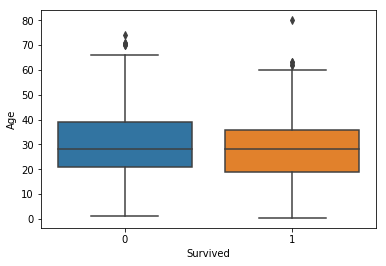

In [16]:
%matplotlib inline
sns.boxplot(x="Survived",y="Age",data=xls)

In [17]:
z=xls.Name.str.split(",")

In [18]:
z.values

array([list(['Braund', ' Mr. Owen Harris']),
       list(['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']),
       list(['Heikkinen', ' Miss. Laina']),
       list(['Futrelle', ' Mrs. Jacques Heath (Lily May Peel)']),
       list(['Allen', ' Mr. William Henry']),
       list(['Moran', ' Mr. James']), list(['McCarthy', ' Mr. Timothy J']),
       list(['Palsson', ' Master. Gosta Leonard']),
       list(['Johnson', ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)']),
       list(['Nasser', ' Mrs. Nicholas (Adele Achem)']),
       list(['Sandstrom', ' Miss. Marguerite Rut']),
       list(['Bonnell', ' Miss. Elizabeth']),
       list(['Saundercock', ' Mr. William Henry']),
       list(['Andersson', ' Mr. Anders Johan']),
       list(['Vestrom', ' Miss. Hulda Amanda Adolfina']),
       list(['Hewlett', ' Mrs. (Mary D Kingcome) ']),
       list(['Rice', ' Master. Eugene']),
       list(['Williams', ' Mr. Charles Eugene']),
       list(['Vander Planke', ' Mrs. Julius (Emelia Maria Vandemoo

In [19]:
for i in z[0]:
    print(i)

Braund
 Mr. Owen Harris


In [20]:
z.str[0][0]

'Braund'

In [21]:
xls.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FirstName', 'LastName',
       'Title'],
      dtype='object')

In [22]:
xls_drop=xls.drop(["Ticket"],axis=1)

In [23]:
xls_num=xls_drop.select_dtypes(include=[np.number])

In [24]:
xls_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
0,1,0,3,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,5
2,3,1,3,26.0,0,0,7.9250,4
3,4,1,1,35.0,1,0,53.1000,5
4,5,0,3,35.0,0,0,8.0500,2
5,6,0,3,NaN,0,0,8.4583,2
6,7,0,1,54.0,0,0,51.8625,2
7,8,0,3,2.0,3,1,21.0750,5
8,9,1,3,27.0,0,2,11.1333,5
9,10,1,2,14.0,1,0,30.0708,5


In [25]:
xls.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
FirstName        0
LastName         0
Title            0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [26]:
xls_random_ages = np.random.randint(xls_drop["Age"].mean() - xls_drop["Age"].std(),xls_drop["Age"].mean() + xls_drop["Age"].std(),size =  xls_drop["Age"].isnull().sum())

In [27]:
xls_random_ages

array([17, 26, 26, 22, 25, 27, 22, 26, 34, 36, 20, 41, 21, 26, 26, 31, 32,
       25, 16, 34, 31, 38, 32, 27, 18, 43, 19, 31, 30, 27, 31, 18, 20, 42,
       23, 37, 15, 40, 38, 27, 24, 42, 28, 26, 38, 33, 27, 43, 32, 28, 33,
       41, 31, 24, 40, 29, 22, 21, 24, 40, 32, 32, 24, 15, 35, 38, 42, 41,
       26, 22, 30, 19, 37, 35, 31, 37, 35, 34, 33, 43, 18, 33, 30, 39, 20,
       42, 40, 40, 15, 40, 34, 39, 41, 24, 37, 22, 27, 40, 24, 26, 35, 24,
       26, 36, 32, 15, 38, 16, 23, 21, 15, 28, 27, 38, 39, 34, 17, 15, 22,
       21, 20, 39, 18, 28, 31, 23, 41, 23, 22, 18, 34, 21, 40, 33, 15, 41,
       21, 26, 22, 37, 30, 37, 23, 28, 25, 26, 24, 36, 25, 28, 16, 20, 25,
       29, 29, 37, 25, 39, 28, 16, 30, 36, 41, 41, 26, 22, 27, 32, 41, 39,
       28, 38, 15, 30, 31, 18, 25])

In [28]:
np.isnan(xls_drop["Age"])

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
xls_drop["Age"][np.isnan(xls_drop["Age"])]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
       ..
718   NaN
727   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
766   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
792   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
849   NaN
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [30]:
xls_drop["Age"][np.isnan(xls_drop["Age"])]=xls_random_ages

C:\Users\HP\AppData\Local\conda\conda\envs\tfdeeplearning_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
xls_drop.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
FirstName        0
LastName         0
Title            0
Embarked         2
Cabin          687
dtype: int64

In [32]:
xls_drop["Embarked"].fillna("C",inplace=True)

In [33]:
xls_drop.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FirstName        0
LastName         0
Title            0
Cabin          687
dtype: int64

In [34]:
xls_drop["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

0      0
1      1
2      0
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     0
      ..
861    0
862    1
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    1
872    1
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [35]:
xls_drop["Cabin"]=xls_drop["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [36]:
xls_drop.isnull().sum().sort_values(ascending=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
FirstName      0
LastName       0
Title          0
dtype: int64

In [37]:
xls_drop['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int32

In [38]:
xls_drop['Embarked']=xls_drop['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [39]:
xls_drop['Sex']=xls_drop['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [40]:
xls_drop["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      17.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     26.0
18     31.0
19     26.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     22.0
27     19.0
28     25.0
29     27.0
       ... 
861    21.0
862    48.0
863    30.0
864    24.0
865    42.0
866    27.0
867    31.0
868    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    18.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [41]:
xls_drop.loc[xls_drop["Age"]<=14,["Age","Name"]]=0
xls_drop.loc[(xls_drop["Age"]>14) & (xls_drop["Age"]<=32),["Age","Name"]]=1
xls_drop.loc[(xls_drop["Age"]>32) & (xls_drop["Age"]<=48),["Age","Name"]]=2
xls_drop.loc[(xls_drop["Age"]>48) & (xls_drop["Age"]<=64),["Age","Name"]]=3    
xls_drop.loc[(xls_drop["Age"]>64),["Age","Name"]]=4

In [42]:
    xls_drop.loc[ xls_drop['Fare'] <= 7.91, 'Fare'] = 0
    xls_drop.loc[(xls_drop['Fare'] > 7.91) & (xls_drop['Fare'] <= 14.454), 'Fare'] = 1
    xls_drop.loc[(xls_drop['Fare'] > 14.454) & (xls_drop['Fare'] <= 31), 'Fare']   = 2
    xls_drop.loc[ xls_drop['Fare'] > 31, 'Fare'] = 3

In [43]:
xls_drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FirstName,LastName,Title
0,1,0,3,1,0,1.0,1,0,0.0,0,0,Owen Harris,Braund,2
1,2,1,1,2,1,2.0,1,0,3.0,1,1,John Bradley (Florence Briggs Thayer),Cumings,5
2,3,1,3,1,1,1.0,0,0,1.0,0,0,Laina,Heikkinen,4
3,4,1,1,2,1,2.0,1,0,3.0,1,0,Jacques Heath (Lily May Peel),Futrelle,5
4,5,0,3,2,0,2.0,0,0,1.0,0,0,William Henry,Allen,2
5,6,0,3,1,0,1.0,0,0,1.0,0,2,James,Moran,2
6,7,0,1,3,0,3.0,0,0,3.0,1,0,Timothy J,McCarthy,2
7,8,0,3,0,0,0.0,3,1,2.0,0,0,Gosta Leonard,Palsson,5
8,9,1,3,1,1,1.0,0,2,1.0,0,0,Oscar W (Elisabeth Vilhelmina Berg),Johnson,5
9,10,1,2,0,1,0.0,1,0,2.0,0,1,Nicholas (Adele Achem),Nasser,5


In [44]:
titanic_test=pd.read_csv("D:/data_scince/data_document/titanic_test.csv")

In [45]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [46]:
 titanic_test["FirstName"] = titanic_test.Name.str.split(",")

In [47]:
titanic_test["LastName"]=titanic_test.FirstName.str[0]

In [48]:
titanic_test["LastName"]=titanic_test.FirstName.str[0]

In [49]:
titanic_test.FirstName=titanic_test.FirstName.str[1]

In [50]:
titanic_test["Title"]=titanic_test.FirstName.str.split(".")

In [51]:
titanic_test.FirstName=titanic_test.Title.str[1]
titanic_test.Title=titanic_test.Title.str[0]

In [52]:
titanic_test.Title = titanic_test.Title.str.strip(" ")

In [53]:
titanic_test.Title = titanic_test.Title.replace(["Col", "Capt", "Major"], 1)
titanic_test.Title = titanic_test.Title.replace(["Mr", "Sir"], 2)
titanic_test.Title = titanic_test.Title.replace(["Rev", "Don", "Dr"], 3)
titanic_test.Title = titanic_test.Title.replace(["Mrs", "Mme", "Master", "Dona"], 5)
titanic_test.Title = titanic_test.Title.replace(["Lady", "the Countess", "Jonkheer"], 6)
titanic_test.Title = titanic_test.Title.replace(["Miss", "Mlle", "Ms"], 4)

In [54]:
titanic_test.isnull().sum().sort_values(ascending=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
FirstName        0
LastName         0
Title            0
Fare             1
Age             86
Cabin          327
dtype: int64

In [55]:
titanic_test_drop=titanic_test.drop(["Ticket"],axis=1)

In [56]:
titanic_test_drop["Cabin"]=titanic_test_drop["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [57]:
titanic_test_drop['Embarked']=titanic_test_drop['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [58]:
titanic_test_drop["Age"].mean()

30.272590361445783

In [59]:
titanic_test_drop["Age"].std()

14.181209235624422

In [60]:
xls_test_random_ages = np.random.randint(titanic_test_drop["Age"].mean() - titanic_test_drop["Age"].std(),titanic_test_drop["Age"].mean() + titanic_test_drop["Age"].std(),size =  titanic_test_drop["Age"].isnull().sum())

In [61]:
np.isnan(titanic_test_drop["Age"])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408     True
409    False
410     True
411    False
412    False
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

In [62]:
titanic_test_drop["Age"][np.isnan(titanic_test_drop["Age"])]=xls_test_random_ages

C:\Users\HP\AppData\Local\conda\conda\envs\tfdeeplearning_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
 titanic_test_drop['Fare'].fillna(3,inplace=True)

In [64]:
titanic_test_drop['Sex']=titanic_test_drop['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [65]:
titanic_test_drop.loc[titanic_test_drop["Age"]<=14,["Age","Name"]]=0
titanic_test_drop.loc[(titanic_test_drop["Age"]>14) & (titanic_test_drop["Age"]<=32),["Age","Name"]]=1
titanic_test_drop.loc[(titanic_test_drop["Age"]>32) & (titanic_test_drop["Age"]<=48),["Age","Name"]]=2
titanic_test_drop.loc[(titanic_test_drop["Age"]>48) & (titanic_test_drop["Age"]<=64),["Age","Name"]]=3    
titanic_test_drop.loc[(titanic_test_drop["Age"]>64),["Age","Name"]]=4

In [66]:
titanic_test_drop.loc[ titanic_test_drop['Fare'] <= 7.91, 'Fare'] = 0
titanic_test_drop.loc[(titanic_test_drop['Fare'] > 7.91) & (titanic_test_drop['Fare'] <= 14.454), 'Fare'] = 1
titanic_test_drop.loc[(titanic_test_drop['Fare'] > 14.454) & (titanic_test_drop['Fare'] <= 31), 'Fare']   = 2
titanic_test_drop.loc[ titanic_test_drop['Fare'] > 31, 'Fare'] = 3

In [67]:
Z=titanic_test_drop.drop(["FirstName","LastName"],axis=1)

In [68]:
X=xls_drop.drop((["Survived","FirstName","LastName"]),axis=1)

In [69]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,1,0,1.0,1,0,0.0,0,0,2
1,2,1,2,1,2.0,1,0,3.0,1,1,5
2,3,3,1,1,1.0,0,0,1.0,0,0,4
3,4,1,2,1,2.0,1,0,3.0,1,0,5
4,5,3,2,0,2.0,0,0,1.0,0,0,2
5,6,3,1,0,1.0,0,0,1.0,0,2,2
6,7,1,3,0,3.0,0,0,3.0,1,0,2
7,8,3,0,0,0.0,3,1,2.0,0,0,5
8,9,3,1,1,1.0,0,2,1.0,0,0,5
9,10,2,0,1,0.0,1,0,2.0,0,1,5


X=xls_drop.drop(["Survived"],axis=1)

In [70]:
Y=xls_drop["Survived"]

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [72]:
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100,  max_depth = 3, min_samples_leaf = 5)

In [73]:
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [74]:
clf_entropy.score(X_train, y_train)

0.8298555377207063

In [75]:
clf_gini.score(X_train, y_train)

0.8250401284109149

In [76]:
y_pred_gini = clf_gini.predict(X_test)

In [77]:
y_pred_entropy = clf_entropy.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, r2_score

In [79]:
accuracy_score(y_test,y_pred_gini)

0.82835820895522383

In [80]:
accuracy_score(y_test,y_pred_entropy)

0.81343283582089554

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
clf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [83]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [84]:
clf.score(X_train, y_train)

0.9020866773675762

In [85]:
y_pred_rf = clf.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred_rf)

0.81716417910447758

In [87]:
tiatnic_test_predict = clf.predict(Z)

In [88]:
tiatnic_test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [89]:
from sklearn import svm

In [ ]:
svm_linear = svm.SVC(kernel='poly', C=1, gamma=1)

In [ ]:
svm_linear.fit(X_train, y_train)

In [ ]:
svm_linear.score(X_train, y_train)

In [ ]:
y_pred_svm_linear = svm_linear.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_svm_linear)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5=knn_5.fit(X_train, y_train)

In [ ]:
y_pred_knn_5 = knn_5.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_knn_5)

In [ ]:

knn_9 = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=5,
           weights='uniform')

In [ ]:
knn_9.fit(X_train, y_train)

In [ ]:
y_pred_9 = knn_9.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_9)

In [ ]:
xls_drop.isnull().sum()

In [ ]:
xls_drop

In [ ]:
pd.DataFrame(tiatnic_test_predict).to_csv('titanic_test_1.csv')